In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score




In [15]:
data=pd.read_csv('C:/Users/abdul/Downloads/TRYX.csv')
data = data.drop(columns=['Volume'])
data.head()
data.dropna(inplace=True)
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

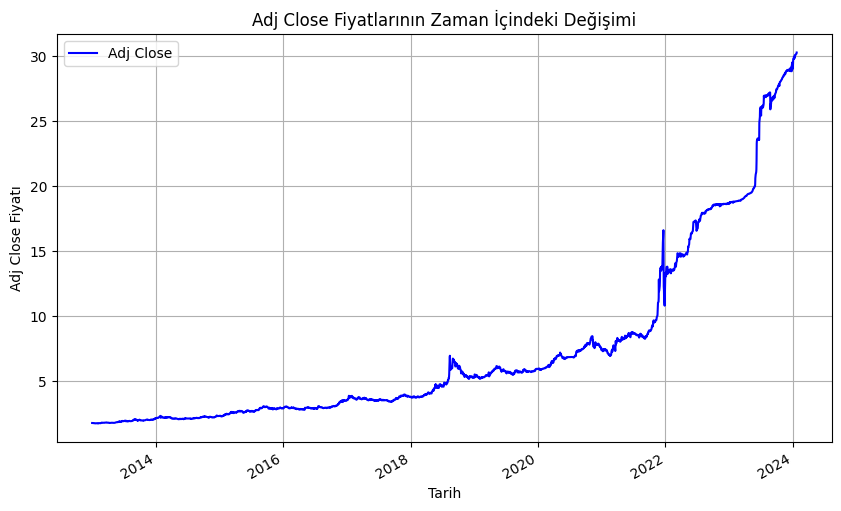

In [16]:
data = pd.DataFrame(data)

# 'Date' sütununu datetime formatına dönüştürün
data['Date'] = pd.to_datetime(data['Date'])

# 'Date' sütununu indeks olarak ayarlayın
data.set_index('Date', inplace=True)

# Grafiği oluşturun
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close'], label='Adj Close', color='blue')

# Tarih formatlama (Yıl ve Ay olarak)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Etiketleri döndür
plt.gcf().autofmt_xdate()

# Grafik detayları
plt.title('Adj Close Fiyatlarının Zaman İçindeki Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Adj Close Fiyatı')
plt.legend()
plt.grid(True)

# Grafiği gösterin
plt.show()

In [17]:
X=data[['Open', 'High', 'Low', 'Close']]
y=data['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:

# Model nesnesini oluşturma
regressor = MLPRegressor(hidden_layer_sizes=(20, 10), activation='relu', solver='adam', random_state=42, max_iter=50000,learning_rate_init=0.0001,early_stopping=True)

# Model nesnesini oluşturma
regressor.fit(X_train,y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=20,
             learning_rate_init=0.0001, max_iter=50000, random_state=42)

In [20]:
# Eğitim seti üzerinde tahmin yapma
y_train_pred = regressor.predict(X_train)

# Test seti üzerinde tahmin yapma
y_test_pred = regressor.predict(X_test)

In [31]:
# Model performansını değerlendirme (örneğin, hata kareler ortalaması - Mean Squared Error)
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

cv_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mean_score = -np.mean(cv_scores)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Cross-validation MSE Ortalaması: {cv_mean_score:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Eğitim seti Hata Karesi: {train_error:.4f}")
print(f"Test seti Hata Karesi: {test_error:.4f}")




Cross-validation MSE Ortalaması: 0.3823
MAPE: 11.53%
Eğitim seti Hata Karesi: 0.3804
Test seti Hata Karesi: 0.3698


In [39]:
# Tahminler için bir tarih aralığı oluşturma (10 gün ileriye tahmin yapılacak)
last_date = data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=2000)

C:\Users\abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


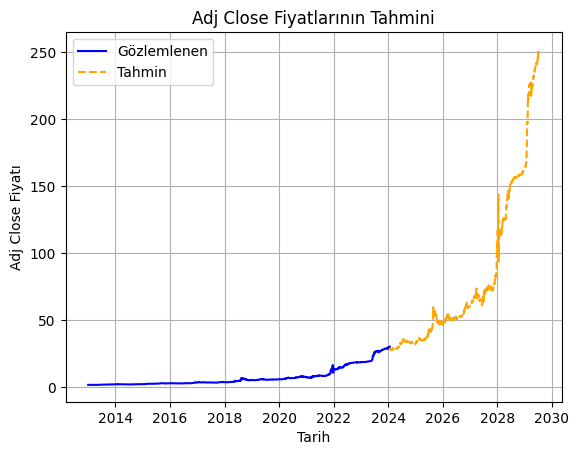

In [41]:
forecast = regressor.predict(X[-2000:])



# Tahminleri bir DataFrame'e eklemek
forecast = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])


# Tahmin grafiği oluşturma

plt.plot(data.index, data['Adj Close'], label='Gözlemlenen', color='blue')
plt.plot(forecast.index, forecast['Forecast'], label='Tahmin', color='orange', linestyle='--')
plt.title('Adj Close Fiyatlarının Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Adj Close Fiyatı')
plt.legend()
plt.grid(True)
plt.show()